From the image provided, do:

1 Cropping the dog's face, save it into another variable to use as a template.<br>
2 Perform template matching using 6 methods (as in the video)<br>
3 Compare the results, create a chart to compare the 6 methods (x-axis: list method, y-axis: how far the original image point is from the template matching result.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

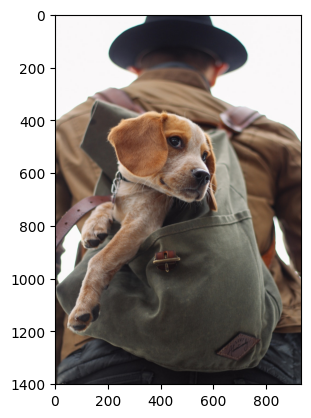

In [3]:
full = cv2.imread('dog_backpack.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

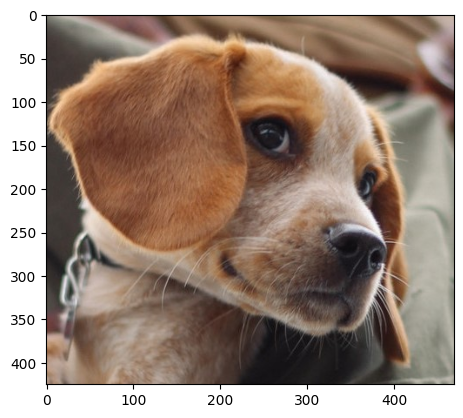

In [4]:
face = cv2.imread('Template.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [5]:
height, width, channels = face.shape

In [6]:
width

469

In [17]:
height

425

In [21]:
#membuat list method
method = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

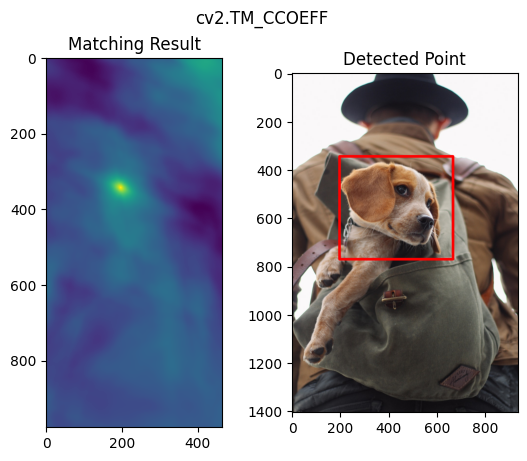

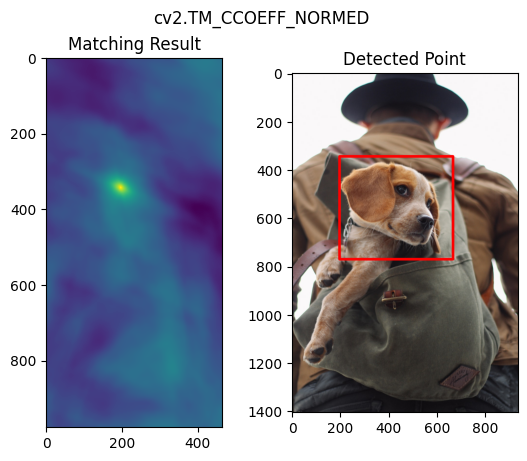

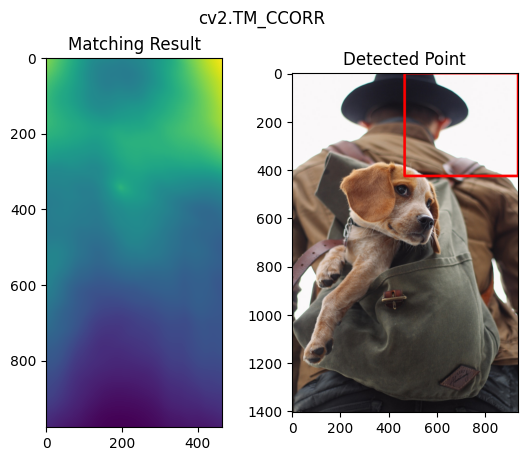

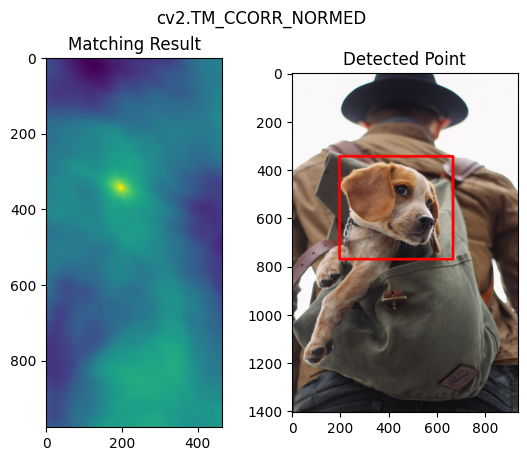

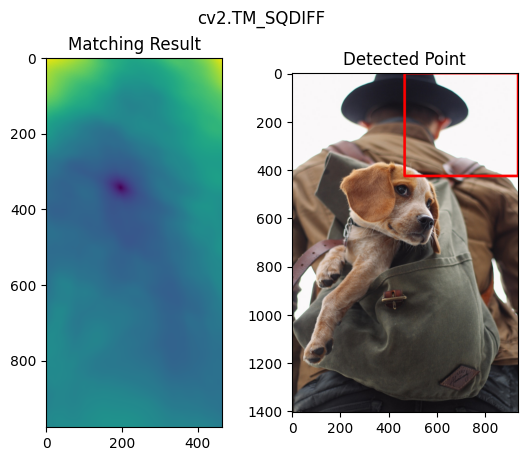

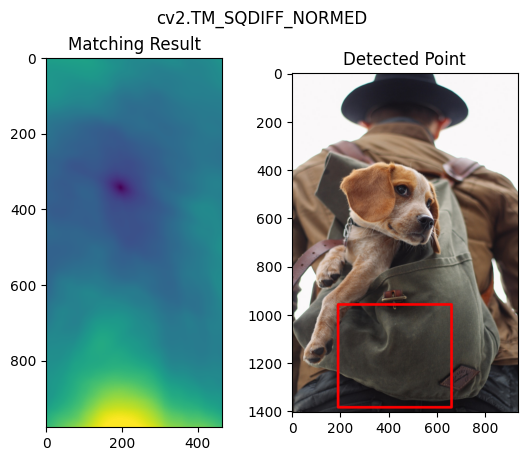

In [22]:
#iterasi untuk setiap method pada list
for m in method:
    #membuat copy dari gambar
    full_copy = full.copy()

    #mengubah string dalam list menjadi fungsi yg callable
    methods = eval(m)

    #template matching untuk setiap fungsi
    res = cv2.matchTemplate(full_copy, face, methods)

    #Mencari min dan max value dan lokasinya
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    #jika menggunakan tmsqdiff dan tmsqdiff ternormalisasi, topleft menggunakan minimum value
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    #menentukan bottom right
    bottom_right = (top_left[0] + width, top_left[1] + height)

    #menggambar kotak deteksi
    cv2.rectangle(full_copy, top_left, bottom_right, 255, 10)

    #plot gambar
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Matching Result')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)

    plt.show()
    print('\n')
    print('\n')